In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from util import build_a, plot_points_over_fit

In [3]:
domain = (0,1)

In [10]:
all_x = np.linspace(domain[0], domain[1], 30)
noise = np.random.normal(0, 0.05, all_x.shape[0])
all_y = np.sin(all_x * 2 * np.pi) + noise

In [11]:
scrambled_indexes = np.random.permutation(all_x.shape[0])
split = math.floor(all_x.shape[0] / 3)
train_indexes, test_indexes = scrambled_indexes[:split], scrambled_indexes[split:]
train_x, train_y = all_x[train_indexes], all_y[train_indexes]
test_x, test_y = all_x[test_indexes], all_y[test_indexes]

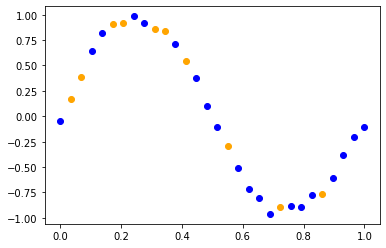

In [12]:
plt.plot(train_x, train_y, marker='o', linestyle='None', color='orange', label='train')
plt.plot(test_x, test_y, marker='o', linestyle='None', color='blue', label='test')
plt.show()

In [13]:
order = 9
A = build_a(order, train_x)
(mw, residuals, rank, s) = np.linalg.lstsq(A, train_y, rcond=None)
print('weights', mw)

weights [-2.41752554e-01  2.10230385e+01 -4.31972399e+02  6.28667404e+03
 -4.88472657e+04  2.11116407e+05 -5.26839448e+05  7.51911314e+05
 -5.67690108e+05  1.75263632e+05]


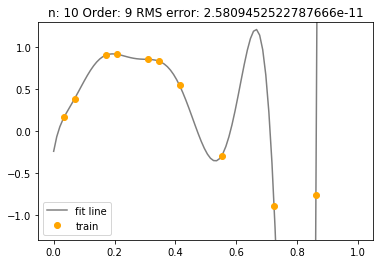

In [14]:
plot_points_over_fit('train', 'orange', domain, train_x, train_y, mw, order)

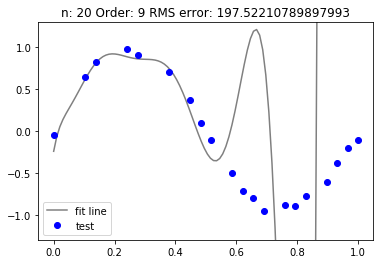

In [15]:
plot_points_over_fit('test', 'blue', domain, test_x, test_y, mw, order)